# Estimation  with Python 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-mean" data-toc-modified-id="The-mean-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The mean</a></span><ul class="toc-item"><li><span><a href="#The-theory" data-toc-modified-id="The-theory-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The theory</a></span></li><li><span><a href="#Practice-with-Python" data-toc-modified-id="Practice-with-Python-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Practice with Python</a></span></li><li><span><a href="#Practice-with-data" data-toc-modified-id="Practice-with-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Practice with data</a></span></li></ul></li><li><span><a href="#The-proportion" data-toc-modified-id="The-proportion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The proportion</a></span></li><li><span><a href="#The-difference-of-two-proportions" data-toc-modified-id="The-difference-of-two-proportions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The difference of two proportions</a></span></li></ul></div>

This chapter aims to show how to compute point estimates and confidence intervals. We explore the following cases:

+ Estimation and confidence interval of the mean,
+ Comparing the confidence of the means by group
+ Estimation and Confidence interval of the proportion
+ Confidence interval of the difference of proportions. 

We start by importing the data in the file `data1.csv`

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data1.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## The mean 

### The theory 

Assume that we're interested in the variable `age` from the imported data, and we would like to know the following information:

+ the average age of the employees in the survey? 
+ the probability that one given employee has an age higher than 50?
+ the distribution of the employees' age between the different departments?  

We will first assume that sequence of employees's age is a random sample. We will write as a sequence of  random variables $X_1,\ldots,X_n$.

We assume also that $X_1,\ldots,X_n$ are  generated from a Normal distribution with mean $\mu$ and with variance $\sigma^2$. 

It's known that the $\overline{X}$ is an estimator of the mean $\mu$. Since the sample mean is also a random variable with normal distribution with mean $\mu$ and variance $\displaystyle\frac{\sigma^2}{n}$, we can provide an interval that provides the error on the estimation. It's called the \textbf{Confidence Interval}.

We aim in chapter to show how   to compute the confidence interval of the mean $\mu$ with level $(1-\alpha)$, $\alpha\in (0,1)$. We denoted by $\mbox{CI}_{1-\alpha}(\mu)$

If $\sigma^2$ is **known**, $\mbox{CI}_{1-\alpha}(\mu)$ is expressed as follows: 
$$ \left(\overline{X} - z_{1-\alpha/2} \displaystyle\frac{\sigma}{\sqrt{n}},\;\overline{X} + z_{1-\alpha/2} \displaystyle\frac{\sigma}{\sqrt{n}}\right)$$

where 
$$\overline{X}=\displaystyle\frac{1}{n}\displaystyle\sum_{i=1}^n X_i$$
is the sample mean and $z_{1-\alpha/2}$ is the percentile associated to $(1-\alpha/2)$ from the standard normal distribution: 
$$F_Z(z_{1-\alpha/2})=1-\alpha/2$$

where $Z$ is a random variable with standard normal distribution. 

If $\sigma^2$ is **unknown**, $\mbox{CI}_{1-\alpha}(\mu)$ is expressed as follows: 
$$ \left(\overline{X} - t_{1-\alpha/2,n-1} \displaystyle\frac{S}{\sqrt{n}},\;\overline{X} + t_{1-\alpha/2,n-1} \displaystyle\frac{S}{\sqrt{n}}\right)$$

where $S^2$ is the sample mean: 
    $$S^2=\displaystyle\frac{1}{n-1}\displaystyle\sum_{i=1}^n (X_i-\overline{X})^2$$
and $t_{1-\alpha/2,n-1}$ is the percentile associated to $(1-\alpha/2)$ from the $t-$distribution with $n-1$ degrees of freedom: 
$$F_{T_{n-1}}(t_{1-\alpha/2,n-1})=1-\alpha/2$$
where $T_{n-1}$ is a random variable with $t-$distribution $n-1$ degrees of freedom. 

### Practice with Python 

In [2]:
import numpy as np
from scipy.stats import norm,t

We will write two functions. A first one returns the $\mbox{CI}_{1-\alpha}(\mu)$  when $\sigma^2$ is known and the second functions returns $\mbox{CI}_{1-\alpha}(\mu)$  when $\sigma^2$ is unknown. 

**1st function**

In [3]:
def get_ci_known_variance(sigma, sample_mean, sample_size, alpha):
    margin_of_error = norm.ppf(1 - alpha/2)*sigma/np.sqrt(sample_size)
    return sample_mean - margin_of_error, sample_mean + margin_of_error


**2nd function**

In [4]:
def get_ci_unknown_variance(sample_s, sample_mean, sample_size, alpha):
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size)
    return sample_mean - margin_of_error, sample_mean + margin_of_error

**Practice**

simulating data 

In [5]:
mu, sigma = 40, 2.5
random_sample = np.random.normal(mu, sigma, 100)

In [6]:
random_sample[0:5]

array([38.03299039, 41.66455159, 41.73117252, 37.66321625, 37.82044562])

Computing the sample mean

In [7]:
sample_mean=np.average(random_sample)

In [8]:
sample_mean

40.090871779180944

In [9]:
sample_size=len(random_sample)
sample_size

100

$\mbox{CI}_{1-\alpha}(\mu)$ with known variance and $\alpha=0.05$

In [10]:
get_ci_known_variance(sigma,sample_mean,sample_size,.05)

(39.60088078304593, 40.58086277531596)

Computing the sample standard deviation 

In [11]:
sample_s=random_sample.std()
sample_s

2.7015723352282577

$\mbox{CI}_{1-\alpha}(\mu)$ with unknown variance and $\alpha=0.05$

In [12]:
get_ci_unknown_variance(sample_s,sample_mean,sample_size,.05)

(39.55482121685226, 40.626922341509626)

We can also use a function already implemented in the library `scipy` to compute $\mbox{CI}_{1-\alpha}(\mu)$ when the variance is unknown. 

In [13]:
confidence_level = 0.95
degrees_freedom = sample_size - 1

In [14]:
import scipy 

In [15]:
sample_standard_error = scipy.stats.sem(random_sample)

In [16]:
sample_standard_error

0.2715182357562536

In [17]:
sample_s/np.sqrt(sample_size-1)

0.27151823575625356

In [18]:
scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

(39.552120693149654, 40.629622865212234)

We can also use `scipy.stats.norm.interval` to compute $\mbox{CI}_{1-\alpha}(\mu)$ with known variance

In [56]:
scipy.stats.norm.interval(.95,loc=sample_mean, scale=sigma/np.sqrt(sample_size))

(39.60088078304593, 40.58086277531596)

### Practice with data  

Application: comparing the average of the Daily rate between Men and Women. 

In [20]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [21]:
df.groupby("Gender").agg({"DailyRate": [np.mean, np.std, np.size]})

DailyRate                 
              mean         std size
Gender                             
Female  808.273810  408.241680  588
Male    798.626984  400.509021  882

In [22]:
x=df.groupby("Gender").agg({"DailyRate": [np.mean, np.std, np.size]})

In [23]:
x=np.array(x)

In [24]:
x

array([[808.27380952, 408.24167967, 588.        ],
       [798.62698413, 400.50902101, 882.        ]])

The female sample size

In [25]:
x[0,2]

588.0

The female sample mean

In [26]:
x[0,0]

808.2738095238095

The female standard error 

In [27]:
x[0,1]/np.sqrt(x[0,2]-1)

16.84993739332325

The `DailyRate` Female $\mbox{CI}(95\%)$

In [28]:
CI_F=scipy.stats.t.interval(.95, x[0,2] -1, x[0,0], x[0,1]/np.sqrt(x[0,2]-1))

In [29]:
CI_F

(775.1803043941346, 841.3673146534844)

We compute then the The DailyRate Female  CI(95%)

We select now the `DailyRate`sample for Men and Women separatly 

In [30]:
CI_M=scipy.stats.t.interval(.95, x[1,2] -1, x[1,0], x[1,1]/np.sqrt(x[1,2]-1))

In [31]:
CI_M

(772.1438431601089, 825.1101250938593)

In [32]:
CI_M[0]

772.1438431601089

We can then visualize these Confidence intervals together to see the difference between the `DailyRate` means. 

In [33]:
ci_dailrate = {}
ci_dailrate['Gender'] = ['Male','Female']
ci_dailrate['lb'] = [CI_M[0],CI_F[0]]
ci_dailrate['ub'] = [CI_M[1],CI_F[1]]
df_ci= pd.DataFrame(ci_dailrate)

In [34]:
df_ci

,Gender,lb,ub
0,Male,772.143843,825.110125
1,Female,775.180304,841.367315


In [35]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x1523a227130>,
 [Text(0, 0, 'Male'), Text(0, 1, 'Female')])

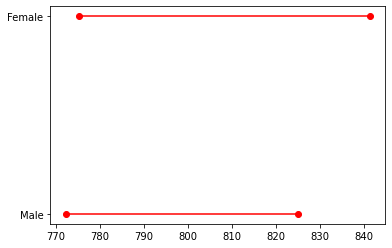

In [36]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Gender']))

We will now write a Python function that can compare the Confidence Intervals of the means for a given continuous variable according to groups defined by a categorical variable.

In [37]:
import pandas as pd
import numpy as np
import scipy.stats as st

def plot_diff_in_means(data: pd.DataFrame,alpha, col1: str, col2: str):
    """
    given data, plots difference in means with confidence intervals across groups
    col1: categorical data with groups
    col2: continuous data for the means
    alpha: is the level of significance, it's usualy equal to .95
    """
    n = data.groupby(col1)[col2].count()
    # n contains a pd.Series with sample size for each category

    cat = list(data.groupby(col1, as_index=False)[col2].count()[col1])
    # cat has names of the categories, like 'category 1', 'category 2'

    mean = data.groupby(col1)[col2].agg('mean')
    # the average value of col2 across the categories

    std = data.groupby(col1)[col2].agg(np.std)
    se = std / np.sqrt(n)
    # standard deviation and standard error

    lower = st.t.interval(alpha = alpha, df=n-1, loc = mean, scale = se)[0]
    upper = st.t.interval(alpha = alpha, df =n-1, loc = mean, scale = se)[1]
    # calculates the upper and lower bounds using scipy

    for upper, mean, lower, y in zip(upper, mean, lower, cat):
        plt.plot((lower, mean, upper), (y, y, y), 'b.-')
        # for 'b.-': 'b' means 'blue', '.' means dot, '-' means solid line
    plt.yticks(
        range(len(n)), 
        list(data.groupby(col1, as_index = False)[col2].count()[col1])
        )

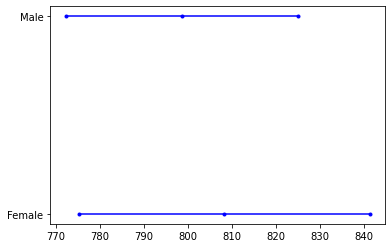

In [38]:
plot_diff_in_means(data = df,alpha=.95, col1 = 'Gender', col2 = 'DailyRate')

`DailyRate` and `EducationField`

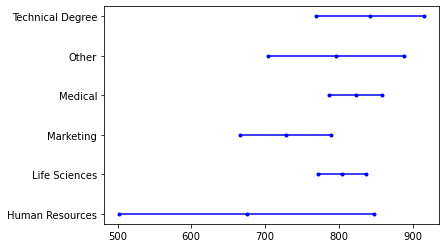

In [39]:
plot_diff_in_means(data = df,alpha=.95, col1 = 'EducationField', col2 = 'DailyRate')

`DailyRate` and `Department`

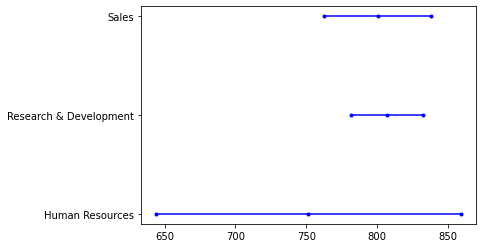

In [40]:
plot_diff_in_means(data = df,alpha=.95, col1 = 'Department', col2 = 'DailyRate')

## The proportion 

Assume that we would like to estimate the probability $p$ to win an election for candidate A. We randomly select $n$ and consider $X$ the number of people reported that will vote for A. 

The probability or the proportion $p$ is then estimated by 

$$\widehat{p}=\displaystyle\frac{X}{n}$$

In most of the cases the number $n$, the sample size, is large and the probability distribution of $\widehat{p}$ is approximated with a Normal distribution with mean $\mu=p$ and variable $\sigma^2=\displaystyle\frac{p(1-p)}{n}$. We can provide then, for a given $\alpha\in(0,1)$, a \textbf{Confidence interval} with level $1-\alpha$: 

$$\mbox{CI}_{1-\alpha}(p)=\left(\widehat{p}-z_{1-\alpha/2} \sqrt{\displaystyle\frac{\widehat{p}(1-\widehat{p})}{n}},\; \widehat{p}+z_{1-\alpha/2} \sqrt{\displaystyle\frac{\widehat{p}(1-\widehat{p})}{n}}\right)$$

where $z_{1-\alpha/2}$ is the $z-$score associate to $1-\alpha/2$. It means, if $Z$ is a standard normal distribution, then $$F_Z(z_{1-\alpha/2})=1-\alpha/2$$
Where $F_Z$ is the CDF of $Z$. 

**Example:**  A Survey was conducted to estimate the probability $p$ to vote a candidate $A$. Among the 1200 participated in the Survey, 560 reported that will vote for the candidate A. Find an estimation of $p$ and its 95\%-Confidence Interval. 

In [41]:
import statsmodels.api as sm

Importing the Function for computing proportion confidence intervals

In [42]:
from statsmodels.stats.proportion import proportion_confint

In [43]:
proportion_confint(count=560,    # Number of "successes"
                   nobs=1200,    # Number of trials
                   alpha=(1 - 0.95),
                   method='normal')  # when we use asymptotic normal approximation
# Alpha, which is 1 minus the confidence level

(0.4384399591955059, 0.49489337413782747)

There's also four oothers methods to compute the proportion confidence interval:

+ agresti_coull : [Agresti-Coull interval](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Agresti%E2%80%93Coull_interval)
+ beta : [Clopper-Pearson interval based on Beta distribution](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Clopper%E2%80%93Pearson_interval)
+ wilson : [Wilson Score interval](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Wilson_score_interval)
+ jeffreys : [Jeffreys Bayesian Interval](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Jeffreys_interval)
+ binom_test : experimental, inversion of binom_test

**Example:** We would like to compare the proportion of frequently traveling between the three departments. We start by computing first the contingency table between the variables `BusinessTravel` and `Departments.` 

In [44]:
import pandas as pd

In [45]:
tab = pd.crosstab(df['BusinessTravel'], df['Department'],margins=True)
tab

Department,Human Resources,Research & Development,Sales,All
BusinessTravel,,,,
Non-Travel,6,97,47,150
Travel_Frequently,11,182,84,277
Travel_Rarely,46,682,315,1043
All,63,961,446,1470


In [46]:
table = sm.stats.Table(tab)
table.table

array([[   6.,   97.,   47.,  150.],
       [  11.,  182.,   84.,  277.],
       [  46.,  682.,  315., 1043.],
       [  63.,  961.,  446., 1470.]])

In [47]:
CI_HR=proportion_confint(count=table.table[1,0],nobs=table.table[3,0],alpha=(1-.95))
CI_HR

(0.08086094446182195, 0.2683454047445272)

In [48]:
CI_RD=proportion_confint(count=table.table[1,1],nobs=table.table[3,1],alpha=(1-.95))
CI_RD

(0.16461369335918247, 0.214158419023752)

In [49]:
CI_SL=proportion_confint(count=table.table[1,2],nobs=table.table[3,2],alpha=(1-.95))
CI_SL

(0.1520547541182747, 0.22462686023150105)

In [50]:
ci_travel = {}
ci_travel['Department'] = ['HR','RD','Sales']
ci_travel['lb'] = [CI_HR[0],CI_RD[0],CI_SL[0]]
ci_travel['ub'] = [CI_HR[1],CI_RD[1],CI_SL[1]]
df_ci= pd.DataFrame(ci_travel)
df_ci

,Department,lb,ub
0,HR,0.080861,0.268345
1,RD,0.164614,0.214158
2,Sales,0.152055,0.224627


In [51]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x1523b764e80>,
 [Text(0, 0, 'HR'), Text(0, 1, 'RD'), Text(0, 2, 'Sales')])

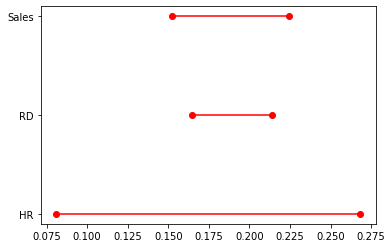

In [52]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Department']))

## The difference of two proportions 

We observe now two independents samples with different sizes $n_1$ and $n_2$. We estimate from each sample a proportion. We aim to provide a **confidence interval** of the difference between these proportions. It can be expressed as follows: 


$$\mbox{CI}_{1-\alpha}(p_1-p_2)=\left(\widehat{p}_1-\widehat{p}_2-z_{1-\alpha/2} \sqrt{\displaystyle\frac{\widehat{p}_1(1-\widehat{p}_1)}{n_1}+\displaystyle\frac{\widehat{p}_2(1-\widehat{p}_2)}{n_2}},\; \widehat{p}_1-\widehat{p}_2+z_{1-\alpha/2} \sqrt{\displaystyle\frac{\widehat{p}_1(1-\widehat{p}_1)}{n_1}+\displaystyle\frac{\widehat{p}_2(1-\widehat{p}_2)}{n_2}}\right)$$

We will write the following Python function 

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats

def two_proprotions_confint(success_a, size_a, success_b, size_b, significance = 0.05):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its confidence interval;
    resulting confidence interval matches R's prop.test function

    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group

    size_a, size_b : int
        Size, or number of observations in each group

    significance : float, default 0.05
        Often denoted as alpha. Governs the chance of a false positive.
        A significance level of 0.05 means that there is a 5% chance of
        a false positive. In other words, our confidence level is
        1 - 0.05 = 0.95

    Returns
    -------
    prop_diff : float
        Difference between the two proportion

    confint : 1d ndarray
        Confidence interval of the two proportion test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)

    # z critical value
    confidence = 1 - significance
    z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)

    # standard formula for the confidence interval
    # point-estimtate +- z * standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

The Confidence interval of the difference between the  proportions of frequently traveling between R&D and HR departments

In [54]:
two_proprotions_confint(success_a=table.table[1,0],size_a=table.table[3,0],success_b=table.table[1,1],size_b=table.table[3,1])

(0.014782881588292635, array([-0.08217729,  0.11174306]))

The Confidence interval of the difference between the  proportions of frequently traveling between R&D and Sales departments

In [55]:
two_proprotions_confint(success_a=table.table[1,2],size_a=table.table[3,2],success_b=table.table[1,1],size_b=table.table[3,1])

(0.001045249016579347, array([-0.04289047,  0.04498097]))